In [ ]:
samples_names = []

In [ ]:
# prompt: ler o nome dos arquivos salvo na caminho 'content\'

import os
for filename in os.listdir('/content/'):
  samples_names.append(filename)


In [ ]:
samples_names

['.config',
 '8cm4.jpg',
 'dataset.png',
 '3cm3.jpg',
 '10cm2.jpg',
 '6cm5.jpg',
 '3cm1.jpg',
 '5cm5.jpg',
 '8cm1.jpg',
 '4cm2.jpg',
 '5cm3.jpg',
 '7cm3.jpg',
 '6cm4.jpg',
 '10cm4.jpg',
 '6cm1.jpg',
 '5cm4.jpg',
 '3cm4.jpg',
 '11cm5.jpg',
 '9cm2.jpg',
 '10cm5.jpg',
 '8cm3.jpg',
 '6cm2.jpg',
 '11cm1.jpg',
 '11cm3.jpg',
 '9cm3.jpg',
 '7cm4.jpg',
 '7cm2.jpg',
 '5cm1.jpg',
 '4cm1.jpg',
 '5cm2.jpg',
 '10cm3.jpg',
 '11cm2.jpg',
 'Dimensões do bloco de referência.txt',
 '4cm5.jpg',
 '6cm3.jpg',
 '9cm5.jpg',
 '7cm1.jpg',
 '16_FOTOS_JUNTAS.png',
 '11cm4.jpg',
 '8cm5.jpg',
 '8cm2.jpg',
 '9cm4.jpg',
 '9cm1.jpg',
 '4cm4.jpg',
 '3cm5.jpg',
 '10cm1.jpg',
 '7cm5.jpg',
 '4cm3.jpg',
 '3cm2.jpg',
 'sample_data']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def filtrar_strings(lista):
    strings_filtradas = []
    for string in lista:
        if string[0].isdigit() and 'cm' in string:
            strings_filtradas.append(string)
    return strings_filtradas

In [ ]:
samples_names = filtrar_strings(samples_names)

In [ ]:
samples_names = sorted(samples_names)

In [ ]:
import cv2
image_path = '/content/'
samples = {}
for i in samples_names:
  print(image_path+i)
  samples[i] = cv2.imread(image_path+i)

/content/10cm1.jpg
/content/10cm2.jpg
/content/10cm3.jpg
/content/10cm4.jpg
/content/10cm5.jpg
/content/11cm1.jpg
/content/11cm2.jpg
/content/11cm3.jpg
/content/11cm4.jpg
/content/11cm5.jpg
/content/3cm1.jpg
/content/3cm2.jpg
/content/3cm3.jpg
/content/3cm4.jpg
/content/3cm5.jpg
/content/4cm1.jpg
/content/4cm2.jpg
/content/4cm3.jpg
/content/4cm4.jpg
/content/4cm5.jpg
/content/5cm1.jpg
/content/5cm2.jpg
/content/5cm3.jpg
/content/5cm4.jpg
/content/5cm5.jpg
/content/6cm1.jpg
/content/6cm2.jpg
/content/6cm3.jpg
/content/6cm4.jpg
/content/6cm5.jpg
/content/7cm1.jpg
/content/7cm2.jpg
/content/7cm3.jpg
/content/7cm4.jpg
/content/7cm5.jpg
/content/8cm1.jpg
/content/8cm2.jpg
/content/8cm3.jpg
/content/8cm4.jpg
/content/8cm5.jpg
/content/9cm1.jpg
/content/9cm2.jpg
/content/9cm3.jpg
/content/9cm4.jpg
/content/9cm5.jpg


In [ ]:
contour_df = samples.copy()

array([[[120,  68,  51],
        [109,  59,  41],
        [103,  53,  33],
        ...,
        [101,  75,  58],
        [106,  80,  63],
        [106,  82,  64]],

       [[110,  58,  41],
        [100,  50,  32],
        [ 94,  46,  28],
        ...,
        [103,  75,  58],
        [104,  78,  61],
        [103,  79,  61]],

       [[105,  54,  38],
        [ 96,  48,  30],
        [ 91,  45,  27],
        ...,
        [101,  74,  54],
        [100,  75,  55],
        [ 99,  74,  54]],

       ...,

       [[ 83,  52,  37],
        [ 80,  49,  34],
        [ 76,  45,  30],
        ...,
        [ 87,  57,  32],
        [ 88,  59,  32],
        [ 87,  60,  33]],

       [[ 89,  55,  42],
        [ 88,  55,  40],
        [ 84,  51,  36],
        ...,
        [ 90,  60,  33],
        [ 92,  62,  35],
        [ 91,  62,  35]],

       [[ 85,  51,  38],
        [ 88,  54,  41],
        [ 87,  54,  39],
        ...,
        [ 92,  62,  35],
        [ 93,  63,  36],
        [ 94,  64,  37]]], dtype=uint8)
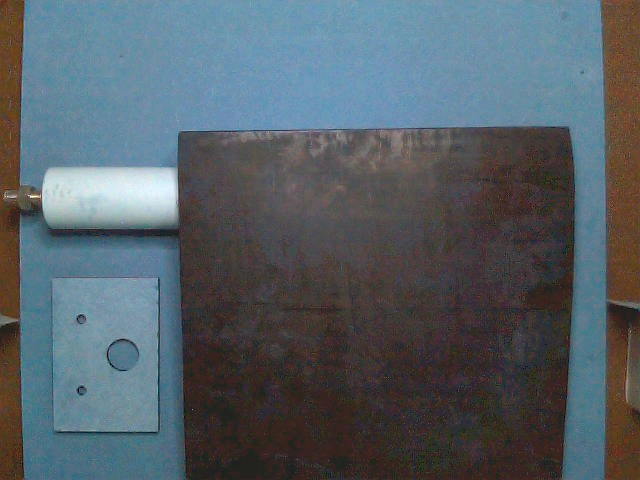

In [ ]:
contour_df['11cm4.jpg']

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
lower_threshold = 152
upper_threshold = 255
min_area_threshold = 500  # Adjust the minimum area threshold as needed
max_area_threshold = 10000

In [ ]:
def digital_process(sample):
  gray = cv2.cvtColor(sample, cv2.COLOR_BGR2GRAY)
  # Create a binary image using thresholding range
  binary_image = cv2.inRange(gray, lower_threshold, upper_threshold)

  # Find contours in the binary image
  contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Create a copy of the original image to draw contours on
  #contour_image = image.copy()

  # Filter contours based on area
  filtered_contours = [cnt for cnt in contours if min_area_threshold < cv2.contourArea(cnt) < max_area_threshold]
  # Calculate the eccentricity of each contour
  max_eccentricity = 0
  max_eccentricity_contour = None

  for contour in filtered_contours:
      moments = cv2.moments(contour)
      if moments["m00"] != 0:
          cx = int(moments["m10"] / moments["m00"])
          cy = int(moments["m01"] / moments["m00"])
          mu20 = moments["mu20"]
          mu02 = moments["mu02"]
          mu11 = moments["mu11"]
          eccentricity = (
              mu20 + mu02 + np.sqrt(4 * mu11 ** 2 + (mu20 - mu02) ** 2)
          ) / (mu20 + mu02 - np.sqrt(4 * mu11 ** 2 + (mu20 - mu02) ** 2))

          if eccentricity > max_eccentricity:
              max_eccentricity = eccentricity
              max_eccentricity_contour = contour
  longest_distance = 0
  longest_distance_coords = None
  if max_eccentricity_contour is not None:
      for i in range(len(max_eccentricity_contour)):
          for j in range(i + 1, len(max_eccentricity_contour)):
              coord_i = tuple(max_eccentricity_contour[i][0])
              coord_j = tuple(max_eccentricity_contour[j][0])
              distance = np.linalg.norm(np.array(coord_i) - np.array(coord_j))
              angle_rad = np.arctan2(coord_j[1] - coord_i[1], coord_j[0] - coord_i[0])
              angle_deg = np.degrees(angle_rad)
              if distance > longest_distance and angle_deg == 0:
                  longest_distance = distance
                  longest_distance_coords = (coord_i, coord_j)
  return [longest_distance/(107/9),longest_distance,longest_distance_coords]

In [ ]:
calculated_dist = {}
for x in samples_names:
  calculated_dist[x] = digital_process(samples[x])

In [ ]:
calculated_dist

{'10cm1.jpg': [10.009345794392523, 119.0, ((55, 211), (174, 211))],
 '10cm2.jpg': [10.261682242990654, 122.0, ((54, 199), (176, 199))],
 '10cm3.jpg': [10.345794392523365, 123.0, ((54, 199), (177, 199))],
 '10cm4.jpg': [9.925233644859812, 118.0, ((58, 168), (176, 168))],
 '10cm5.jpg': [10.009345794392523, 119.0, ((56, 212), (175, 212))],
 '11cm1.jpg': [11.271028037383177, 134.0, ((42, 204), (176, 204))],
 '11cm2.jpg': [11.102803738317757, 132.0, ((44, 176), (176, 176))],
 '11cm3.jpg': [11.271028037383177, 134.0, ((42, 204), (176, 204))],
 '11cm4.jpg': [11.271028037383177, 134.0, ((43, 179), (177, 179))],
 '11cm5.jpg': [11.271028037383177, 134.0, ((42, 203), (176, 203))],
 '3cm1.jpg': [3.02803738317757, 36.0, ((143, 199), (179, 199))],
 '3cm2.jpg': [3.02803738317757, 36.0, ((143, 198), (179, 198))],
 '3cm3.jpg': [2.7757009345794392, 33.0, ((145, 200), (178, 200))],
 '3cm4.jpg': [2.8598130841121496, 34.0, ((145, 208), (179, 208))],
 '3cm5.jpg': [3.02803738317757, 36.0, ((143, 198), (179, 